### 전국 신용카드 승인금액

In [1]:
import pandas as pd

# csv파일 불러오기
df = pd.read_csv('./data/카드_전국.csv')
df

,날짜,전국_합계,전국_종합소매,전국_ 백화점,전국_ 대형마트/유통전문점,전국_ 슈퍼마켓,전국_ 편의점,전국_ 면세점,전국_전자상거래/통신판매,전국_식료품,...,전국_오락/문화,전국_ 스포츠/오락/여가,전국_ 서적/문구,전국_교육,전국_숙박/음식,전국_ 숙박,전국_ 음식점,전국_공과금/개인 및 전문 서비스,전국_금융/보험,전국_기타
0,2012/11,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,...,13142.50,10450.19,2692.31,8644.69,33317.61,2119.99,31197.62,25205.61,10618.86,18468.27
1,2012/12,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,...,12041.55,9030.65,3010.90,8440.60,37410.08,2454.51,34955.56,25947.67,10529.91,19655.81
2,2013/01,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,...,10803.91,8001.41,2802.50,8776.78,34309.86,2458.03,31851.83,30498.42,10421.99,19792.28
3,2013/02,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,...,9302.49,6800.21,2502.28,8431.41,28779.93,1821.75,26958.18,25149.57,9509.00,18103.45
4,2013/03,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,...,12895.59,9214.35,3681.25,8996.41,34196.47,1898.21,32298.26,25570.21,10253.94,19820.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021/12,539935.08,72991.73,16509.80,29238.11,17759.22,8968.91,515.68,132006.30,10014.39,...,12723.92,9748.01,2975.90,10762.54,47156.65,2732.84,44423.81,60242.33,24112.50,40410.91
110,2022/01,545394.92,76347.07,16044.01,31659.32,19422.93,8730.99,489.82,131621.64,12855.90,...,11337.65,8512.42,2825.23,11109.97,44354.54,2624.21,41730.34,72049.97,22435.69,39684.46
111,2022/02,470296.08,62651.29,12867.77,25751.48,15657.35,7927.86,446.83,119029.37,7986.69,...,10204.06,7841.77,2362.28,10193.33,36902.07,2436.82,34465.24,54784.83,21303.98,35973.76
112,2022/03,539346.45,71787.11,14932.79,28682.36,18116.34,9562.31,493.32,134751.97,8896.80,...,14276.81,10963.02,3313.79,11284.20,44099.97,2223.13,41876.84,59248.48,25145.71,40845.27


In [2]:
# 날짜 컬럼 "/" 제거
df["날짜"] = df["날짜"].str.replace("/", "")

# 날짜 컬럼 int 타입으로 변환
df["날짜"] = df["날짜"].astype(int)

# 날짜 데이터타임 변환 후 인덱스 변환
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')
df["날짜"] = df["날짜"].dt.strftime('%Y-%m')
df.set_index('날짜', inplace=True)

In [3]:
# 컬럼 맞추기
df.columns = df.columns.str.replace('_ ','_')
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['전국_합계', '전국_종합소매', '전국_백화점', '전국_대형마트/유통전문점', '전국_슈퍼마켓', '전국_편의점',
       '전국_면세점', '전국_전자상거래/통신판매', '전국_식료품', '전국_일반식료품', '전국_건강보조식품',
       '전국_의류/잡화', '전국_의복/직물', '전국_복식잡화', '전국_시계/귀금속/안경', '전국_화장품', '전국_연료',
       '전국_가구/가전', '전국_가구', '전국_가전제품/정보통신기기', '전국_의료/보건', '전국_종합병원',
       '전국_일반병의원/기타의료기관', '전국_자동차', '전국_국산자동차신품', '전국_기타운송수단', '전국_자동차부품및정비',
       '전국_여행/교통', '전국_여행사/자동차임대', '전국_항공사', '전국_대중교통', '전국_오락/문화',
       '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육', '전국_숙박/음식', '전국_숙박', '전국_음식점',
       '전국_공과금/개인및전문서비스', '전국_금융/보험', '전국_기타'],
      dtype='object')

### 분류별 상품 나누기

In [4]:
# 합계 분류 하기
df_t = df[['전국_종합소매','전국_전자상거래/통신판매', '전국_식료품','전국_의류/잡화', 
'전국_연료','전국_가구/가전', '전국_의료/보건', '전국_자동차', '전국_여행/교통', '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육','전국_숙박','전국_음식점'
,'전국_공과금/개인및전문서비스', '전국_금융/보험']]
# 등락률 구하기
df_t1 = df[['전국_종합소매','전국_전자상거래/통신판매', '전국_식료품','전국_의류/잡화',
'전국_연료','전국_가구/가전', '전국_의료/보건', '전국_자동차', '전국_여행/교통', '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육','전국_숙박','전국_음식점'
,'전국_공과금/개인및전문서비스', '전국_금융/보험']].pct_change().round(2)

In [5]:
# 온/오프라인 구분
df_on = df[['전국_전자상거래/통신판매']]
df_off = df[['전국_종합소매','전국_식료품','전국_의류/잡화', '전국_복식잡화',
'전국_연료','전국_가구/가전', '전국_의료/보건', '전국_자동차', '전국_여행/교통', '전국_스포츠/오락/여가','전국_숙박','전국_음식점'
,'전국_공과금/개인및전문서비스', '전국_금융/보험', '전국_기타']]
# 등락률 구하기
df_on1 = df[['전국_전자상거래/통신판매']].pct_change().round(2)
df_off2 = df[['전국_종합소매','전국_식료품','전국_의류/잡화', '전국_복식잡화',
'전국_연료','전국_가구/가전', '전국_의료/보건', '전국_자동차', '전국_여행/교통', '전국_스포츠/오락/여가','전국_숙박','전국_음식점'
,'전국_공과금/개인및전문서비스', '전국_금융/보험', '전국_기타']].pct_change().round(2)

In [6]:
# 소모품 구분
df_dura = df[['전국_자동차','전국_가구/가전']]
df_semidura = df[['전국_의류/잡화','전국_스포츠/오락/여가']]
df_nondura = df[['전국_식료품','전국_연료']]
# 등락률 구하기
df_dura1 = df[['전국_자동차','전국_가구/가전']].pct_change().round(2)
df_semidura1 = df[['전국_의류/잡화','전국_스포츠/오락/여가']].pct_change().round(2)
df_nondura1 = df[['전국_식료품','전국_연료']].pct_change().round(2)

In [7]:
# 서비스 상품 구분
df_servise = df[['전국_여행/교통','전국_숙박','전국_음식점','전국_공과금/개인및전문서비스', '전국_금융/보험'
,'전국_서적/문구','전국_의료/보건']]
# 등락률 구하기
df_servise = df[['전국_여행/교통','전국_숙박','전국_음식점','전국_공과금/개인및전문서비스', '전국_금융/보험'
,'전국_서적/문구','전국_의료/보건']].pct_change().round(2)

In [8]:
# 상품 나누기
'''df_res = df[['날짜','전국_숙박/음식', '전국_숙박', '전국_음식점']]
df_shooping = df[['날짜', '전국_백화점', '전국_대형마트/유통전문점', '전국_슈퍼마켓', '전국_편의점']]
df_vechicle = df[['날짜', '전국_자동차', '전국_국산자동차신품', '전국_기타운송수단', '전국_자동차 부품 및 정비', '전국_연료']]
df_travel = df[['날짜','전국_면세점','전국_여행/교통','전국_여행사/자동차임대','전국_항공사','전국_대중교통','전국_오락/문화','전국_스포츠/오락/여가']]
df_retail = df[['날짜','전국_종합소매','전국_식료품','전국_일반식료품','전국_가구/가전','전국_가구','전국_가전제품/정보통신기기']]
df_fashion = df[['날짜','전국_의류/잡화','전국_의복/직물','전국_복식잡화','전국_시계/귀금속/안경','전국_화장품']]
df_online = df[['날짜','전국_전자상거래/통신판매']]
df_hospital = df[['날짜','전국_건강보조식품','전국_의료/보건','전국_종합병원','전국_일반병의원/기타의료기관']]
df_etc = df[['날짜','전국_서적/문구','전국_교육','전국_공과금/개인및전문서비스','전국_금융/보험','전국_기타']]'''

"df_res = df[['날짜','전국_숙박/음식', '전국_숙박', '전국_음식점']]\ndf_shooping = df[['날짜', '전국_백화점', '전국_대형마트/유통전문점', '전국_슈퍼마켓', '전국_편의점']]\ndf_vechicle = df[['날짜', '전국_자동차', '전국_국산자동차신품', '전국_기타운송수단', '전국_자동차 부품 및 정비', '전국_연료']]\ndf_travel = df[['날짜','전국_면세점','전국_여행/교통','전국_여행사/자동차임대','전국_항공사','전국_대중교통','전국_오락/문화','전국_스포츠/오락/여가']]\ndf_retail = df[['날짜','전국_종합소매','전국_식료품','전국_일반식료품','전국_가구/가전','전국_가구','전국_가전제품/정보통신기기']]\ndf_fashion = df[['날짜','전국_의류/잡화','전국_의복/직물','전국_복식잡화','전국_시계/귀금속/안경','전국_화장품']]\ndf_online = df[['날짜','전국_전자상거래/통신판매']]\ndf_hospital = df[['날짜','전국_건강보조식품','전국_의료/보건','전국_종합병원','전국_일반병의원/기타의료기관']]\ndf_etc = df[['날짜','전국_서적/문구','전국_교육','전국_공과금/개인및전문서비스','전국_금융/보험','전국_기타']]"

In [9]:
# 등락률 구하기
'''df_res['전국_숙박/음식_등락률'] = df_res['전국_숙박/음식'].pct_change().round(2)
df_res['전국_숙박_등락률'] = df_res['전국_숙박'].pct_change().round(2)
df_res['전국_음식점_등락률'] = df_res['전국_음식점'].pct_change().round(2)
df_shooping['전국_백화점_등락률'] = df_shooping['전국_백화점'].pct_change().round(2)
df_shooping['전국_대형마트/유통전문점_등락률'] = df_shooping['전국_대형마트/유통전문점'].pct_change().round(2)
df_shooping['전국_슈퍼마켓_등락률'] = df_shooping['전국_슈퍼마켓'].pct_change().round(2)
df_shooping['전국_편의점_등락률'] = df_shooping['전국_편의점'].pct_change().round(2)
df_vechicle['전국_자동차_등락률'] = df_vechicle['전국_자동차'].pct_change().round(2)
df_vechicle['전국_국산자동차신품_등락률'] = df_vechicle['전국_국산자동차신품'].pct_change().round(2)
df_vechicle['전국_기타운송수단_등락률'] = df_vechicle['전국_기타운송수단'].pct_change().round(2)
df_vechicle['전국_자동차 부품 및 정비_등락률'] = df_vechicle['전국_자동차 부품 및 정비'].pct_change().round(2)
df_vechicle['전국_연료_등락률'] = df_vechicle['전국_연료'].pct_change().round(2)
df_travel['전국_면세점_등락률'] = df_travel['전국_면세점'].pct_change().round(2)
df_travel['전국_여행/교통_등락률'] = df_travel['전국_여행/교통'].pct_change().round(2)
df_travel['전국_여행사/자동차임대_등락률'] = df_travel['전국_여행사/자동차임대'].pct_change().round(2)
df_travel['전국_항공사_등락률'] = df_travel['전국_항공사'].pct_change().round(2)
df_travel['전국_대중교통_등락률'] = df_travel['전국_대중교통'].pct_change().round(2)
df_travel['전국_오락/문화_등락률'] = df_travel['전국_오락/문화'].pct_change().round(2)
df_travel['전국_스포츠/오락/여가_등락률'] = df_travel['전국_스포츠/오락/여가'].pct_change().round(2)
df_retail['전국_종합소매_등락률'] = df_retail['전국_종합소매'].pct_change().round(2)
df_retail['전국_식료품_등락률'] = df_retail['전국_식료품'].pct_change().round(2)
df_retail['전국_일반식료품_등락률'] = df_retail['전국_일반식료품'].pct_change().round(2)
df_retail['전국_가구/가전_등락률'] = df_retail['전국_가구/가전'].pct_change().round(2)
df_retail['전국_가구_등락률'] = df_retail['전국_가구'].pct_change().round(2)
df_retail['전국_가전제품/정보통신기기_등락률'] = df_retail['전국_가전제품/정보통신기기'].pct_change().round(2)
df_fashion['전국_의류/잡화_등락률'] = df_fashion['전국_의류/잡화'].pct_change().round(2)
df_fashion['전국_의복/직물_등락률'] = df_fashion['전국_의복/직물'].pct_change().round(2)
df_fashion['전국_복식잡화_등락률'] = df_fashion['전국_복식잡화'].pct_change().round(2)
df_fashion['전국_시계/귀금속/안경_등락률'] = df_fashion['전국_시계/귀금속/안경'].pct_change().round(2)
df_fashion['전국_화장품_등락률'] = df_fashion['전국_화장품'].pct_change().round(2)
df_online['전국_전자상거래/통신판매_등락률'] = df_online['전국_전자상거래/통신판매'].pct_change().round(2)
df_hospital['전국_건강보조식품_등락률'] = df_hospital['전국_건강보조식품'].pct_change().round(2)
df_hospital['전국_의료/보건_등락률'] = df_hospital['전국_의료/보건'].pct_change().round(2)
df_hospital['전국_종합병원_등락률'] = df_hospital['전국_종합병원'].pct_change().round(2)
df_hospital['전국_일반병의원/기타의료기관_등락률'] = df_hospital['전국_일반병의원/기타의료기관'].pct_change().round(2)
df_etc['전국_서적/문구_등락률'] = df_etc['전국_서적/문구'].pct_change().round(2)
df_etc['전국_교육_등락률'] = df_etc['전국_교육'].pct_change().round(2)
df_etc['전국_공과금/개인및전문서비스_등락률'] = df_etc['전국_공과금/개인및전문서비스'].pct_change().round(2)
df_etc['전국_금융/보험_등락률'] = df_etc['전국_금융/보험'].pct_change().round(2)
df_etc['전국_기타_등락률'] = df_etc['전국_기타'].pct_change().round(2)'''

"df_res['전국_숙박/음식_등락률'] = df_res['전국_숙박/음식'].pct_change().round(2)\ndf_res['전국_숙박_등락률'] = df_res['전국_숙박'].pct_change().round(2)\ndf_res['전국_음식점_등락률'] = df_res['전국_음식점'].pct_change().round(2)\ndf_shooping['전국_백화점_등락률'] = df_shooping['전국_백화점'].pct_change().round(2)\ndf_shooping['전국_대형마트/유통전문점_등락률'] = df_shooping['전국_대형마트/유통전문점'].pct_change().round(2)\ndf_shooping['전국_슈퍼마켓_등락률'] = df_shooping['전국_슈퍼마켓'].pct_change().round(2)\ndf_shooping['전국_편의점_등락률'] = df_shooping['전국_편의점'].pct_change().round(2)\ndf_vechicle['전국_자동차_등락률'] = df_vechicle['전국_자동차'].pct_change().round(2)\ndf_vechicle['전국_국산자동차신품_등락률'] = df_vechicle['전국_국산자동차신품'].pct_change().round(2)\ndf_vechicle['전국_기타운송수단_등락률'] = df_vechicle['전국_기타운송수단'].pct_change().round(2)\ndf_vechicle['전국_자동차 부품 및 정비_등락률'] = df_vechicle['전국_자동차 부품 및 정비'].pct_change().round(2)\ndf_vechicle['전국_연료_등락률'] = df_vechicle['전국_연료'].pct_change().round(2)\ndf_travel['전국_면세점_등락률'] = df_travel['전국_면세점'].pct_change().round(2)\ndf_travel['전국_여행/교통_등락률'] = df_travel[

### 소비자 물가지수 불러오기

In [10]:
cpi_df = pd.read_csv('./csv/소비자물가지수_2020100__20220811151333.csv',encoding='cp949')

# 컬럼 문자열로 바꾸기
cpi_df["시점"] = cpi_df["시점"].astype(str)

# .10 이 .1로 변환된 걸 다시 재변환
cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"

# 컬럼명 변경
cpi_df.rename(columns={'전국' : '소비자물가지수'}, inplace=True)
# 날짜 맞추기
cpi_df = cpi_df.iloc[:-3]

# 데이터타임 변황 후 시점컬럼명 날짜로 바꾸기
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format="%Y.%m")
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y-%m')
cpi_df.rename(columns={"시점" : "날짜"}, inplace=True)
cpi_df.set_index('날짜', inplace=True)
cpi_df

C:\Users\82104\AppData\Local\Temp\ipykernel_3916\3132659229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"


,소비자물가지수
날짜,
2012-11,92.011
2012-12,92.175
2013-01,92.728
2013-02,93.038
2013-03,92.952
...,...
2021-12,104.040
2022-01,104.690
2022-02,105.300


### 시장금리 불러오기

In [11]:
interest_rates_df = pd.read_csv('./csv/시장금리.csv')
interest_rates_df.set_index('날짜', inplace=True)
interest_rates_df

,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,
2012-11,2.80,2.87,2.99,3.32,2.85,2.75,2.75
2012-12,2.85,2.98,3.13,3.30,2.88,2.75,2.75
2013-01,2.75,2.86,3.05,3.20,2.86,2.76,2.75
2013-02,2.70,2.83,3.04,3.06,2.83,2.75,2.75
2013-03,2.60,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...
2021-12,1.80,1.98,2.19,2.41,1.27,1.01,1.00
2022-01,2.06,2.28,2.49,2.63,1.39,1.19,1.25
2022-02,2.29,2.50,2.69,2.87,1.50,1.22,1.25


### 소매판매지수 불러오기

In [12]:
socell_df = pd.read_csv('./csv/소매판매지수_1211_2204.csv')
socell_df = socell_df[['날짜','불변_총지수','계절_총지수']]
socell_df.set_index('날짜', inplace=True)
socell_df

,불변_총지수,계절_총지수
날짜,,
2012-11,97.5,94.6
2012-12,99.8,95.0
2013-01,91.2,94.4
2013-02,86.8,94.4
2013-03,93.6,93.9
...,...,...
2021-12,127.2,123.2
2022-01,117.5,120.7
2022-02,107.9,120.7


### 카드 소비 합치기

In [13]:
total_csi = pd.merge(cpi_df, socell_df, how='left', left_index=True, right_index=True)
total_csi = pd.merge(total_csi, interest_rates_df,  how='left', left_index=True, right_index=True)
total_csi.drop_duplicates(inplace=True)
total_csi

,소비자물가지수,불변_총지수,계절_총지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,,,,
2012-11,92.011,97.5,94.6,2.80,2.87,2.99,3.32,2.85,2.75,2.75
2012-12,92.175,99.8,95.0,2.85,2.98,3.13,3.30,2.88,2.75,2.75
2013-01,92.728,91.2,94.4,2.75,2.86,3.05,3.20,2.86,2.76,2.75
2013-02,93.038,86.8,94.4,2.70,2.83,3.04,3.06,2.83,2.75,2.75
2013-03,92.952,93.6,93.9,2.60,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...,...,...,...
2021-12,104.040,127.2,123.2,1.80,1.98,2.19,2.41,1.27,1.01,1.00
2022-01,104.690,117.5,120.7,2.06,2.28,2.49,2.63,1.39,1.19,1.25
2022-02,105.300,107.9,120.7,2.29,2.50,2.69,2.87,1.50,1.22,1.25


### 코로나 전 후 비교를 위한 기간설정

In [164]:
df_t = df_t.iloc[:86]
cpi_df = cpi_df.iloc[:-28]
interest_rates_df = interest_rates_df.iloc[:-28]
socell_df = socell_df.iloc[:-28]

### 상관관계

In [18]:
# 사용할 컬럼 불러오기

total_df = df_t
total_df = pd.DataFrame(total_df)
total_df = pd.merge(total_df,total_csi, how='left', left_index=True, right_index=True)
total_df

,전국_종합소매,전국_전자상거래/통신판매,전국_식료품,전국_의류/잡화,전국_연료,전국_가구/가전,전국_의료/보건,전국_자동차,전국_여행/교통,전국_스포츠/오락/여가,...,소비자물가지수,불변_총지수,계절_총지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,,,,,,,,,,,,,,,
2012-11,53558.49,29166.45,4778.33,14573.28,31259.23,9075.53,22958.88,19238.93,5963.69,10450.19,...,92.011,97.5,94.6,2.80,2.87,2.99,3.32,2.85,2.75,2.75
2012-12,57731.17,29971.83,4895.34,14114.97,30662.26,7966.34,21824.52,22950.20,6390.76,9030.65,...,92.175,99.8,95.0,2.85,2.98,3.13,3.30,2.88,2.75,2.75
2013-01,51384.80,28545.80,5024.76,11912.48,29951.78,7911.53,24766.40,15857.30,6774.19,8001.41,...,92.728,91.2,94.4,2.75,2.86,3.05,3.20,2.86,2.76,2.75
2013-02,48141.86,24596.71,5510.28,11094.71,27288.38,7723.07,21469.13,16453.30,5812.63,6800.21,...,93.038,86.8,94.4,2.70,2.83,3.04,3.06,2.83,2.75,2.75
2013-03,49572.79,26704.28,4775.35,13126.75,30351.01,9811.29,23354.47,20131.39,6079.25,9214.35,...,92.952,93.6,93.9,2.60,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12,72991.73,132006.30,10014.39,10822.68,30042.62,11529.33,40950.31,29960.16,6208.72,9748.01,...,104.040,127.2,123.2,1.80,1.98,2.19,2.41,1.27,1.01,1.00
2022-01,76347.07,131621.64,12855.90,9770.24,29465.30,12837.68,41838.21,23262.35,6424.24,8512.42,...,104.690,117.5,120.7,2.06,2.28,2.49,2.63,1.39,1.19,1.25
2022-02,62651.29,119029.37,7986.69,7934.06,26321.30,11875.13,36520.65,23216.11,5399.46,7841.77,...,105.300,107.9,120.7,2.29,2.50,2.69,2.87,1.50,1.22,1.25


In [15]:
# 컬럼별 등락률 계산

col_list = []
col_list.append([col for col in total_df])

total_df1 = pd.DataFrame()

for i in col_list:
    total_df1[i] = total_df[i].pct_change()
    
total_df1 = total_df1.iloc[1:]
total_df1.head()

,전국_종합소매,전국_전자상거래/통신판매,전국_식료품,전국_의류/잡화,전국_연료,전국_가구/가전,전국_의료/보건,전국_자동차,전국_여행/교통,전국_스포츠/오락/여가,...,소비자물가지수,불변_총지수,계절_총지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
날짜,,,,,,,,,,,,,,,,,,,,,
2012-12,0.077909,0.027613,0.024488,-0.031449,-0.019097,-0.122218,-0.049408,0.192904,0.071612,-0.135839,...,0.001782,0.023590,0.004228,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.0
2013-01,-0.109930,-0.047579,0.026437,-0.156039,-0.023171,-0.006880,0.134797,-0.309056,0.059998,-0.113972,...,0.005999,-0.086172,-0.006316,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.0
2013-02,-0.063111,-0.138342,0.096626,-0.068648,-0.088923,-0.023821,-0.133135,0.037585,-0.141945,-0.150124,...,0.003343,-0.048246,0.000000,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.0
2013-03,0.029723,0.085685,-0.133374,0.183154,0.112232,0.270387,0.087816,0.223547,0.045869,0.355010,...,-0.000924,0.078341,-0.005297,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.0
2013-04,0.052395,0.045225,0.001931,-0.009763,-0.027114,-0.081842,-0.038601,0.004995,0.060437,0.028387,...,-0.001388,-0.018162,0.000000,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.0


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


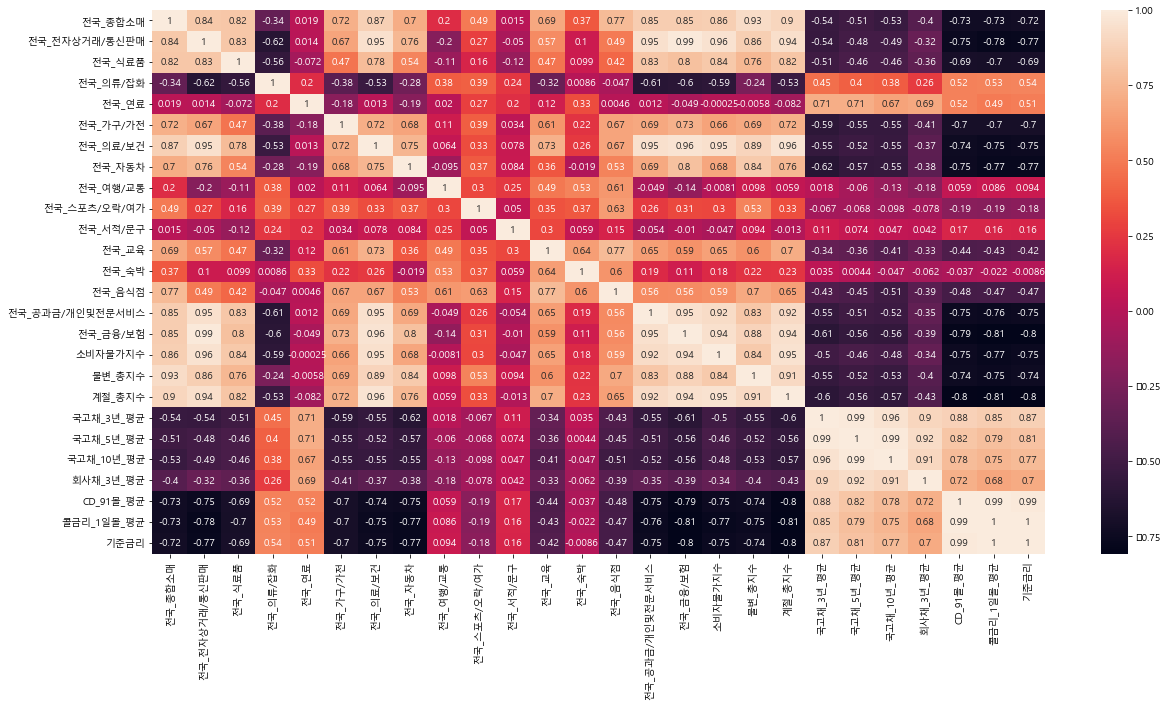

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.figure(figsize=(20,10))
sns.heatmap(total_df.corr(),annot=True)

### 정규성 검정

In [23]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [24]:
shap_pct(total_df1)

전국_종합소매 의 pvalue: 0.2332070767879486
전국_전자상거래/통신판매 의 pvalue: 0.31959614157676697
전국_식료품 의 pvalue: 0.04639626666903496
전국_의류/잡화 의 pvalue: 0.0001094810213544406
전국_연료 의 pvalue: 0.10305468738079071
전국_가구/가전 의 pvalue: 0.025769131258130074
전국_의료/보건 의 pvalue: 0.23985372483730316
전국_자동차 의 pvalue: 0.09779869765043259
전국_여행/교통 의 pvalue: 3.55143333763408e-06
전국_스포츠/오락/여가 의 pvalue: 2.2303004243440228e-06
전국_서적/문구 의 pvalue: 1.8613231134168018e-07
전국_교육 의 pvalue: 0.00784806814044714
전국_숙박 의 pvalue: 0.6277390718460083
전국_음식점 의 pvalue: 0.2686583697795868
전국_공과금/개인및전문서비스 의 pvalue: 0.0343366302549839
전국_금융/보험 의 pvalue: 0.00027949322247877717
소비자물가지수 의 pvalue: 0.6116564273834229
불변_총지수 의 pvalue: 0.6854149103164673
계절_총지수 의 pvalue: 0.024166036397218704
국고채_3년_평균 의 pvalue: 0.0005322760553099215
국고채_5년_평균 의 pvalue: 0.00025925261434167624
국고채_10년_평균 의 pvalue: 0.011288688518106937
회사채_3년_평균 의 pvalue: 5.761821739724837e-06
CD_91몰_평균 의 pvalue: 2.937751020226642e-08
콜금리_1일몰_평균 의 pvalue: 2.2003622882071916e-13
기

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전국_식료품', ylabel='Density'>

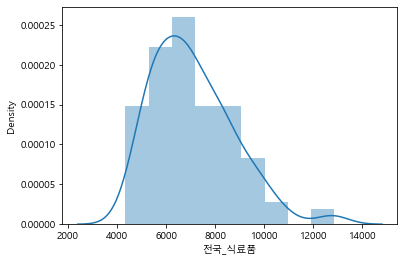

In [25]:
sns.distplot(total_df['전국_식료품'])

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

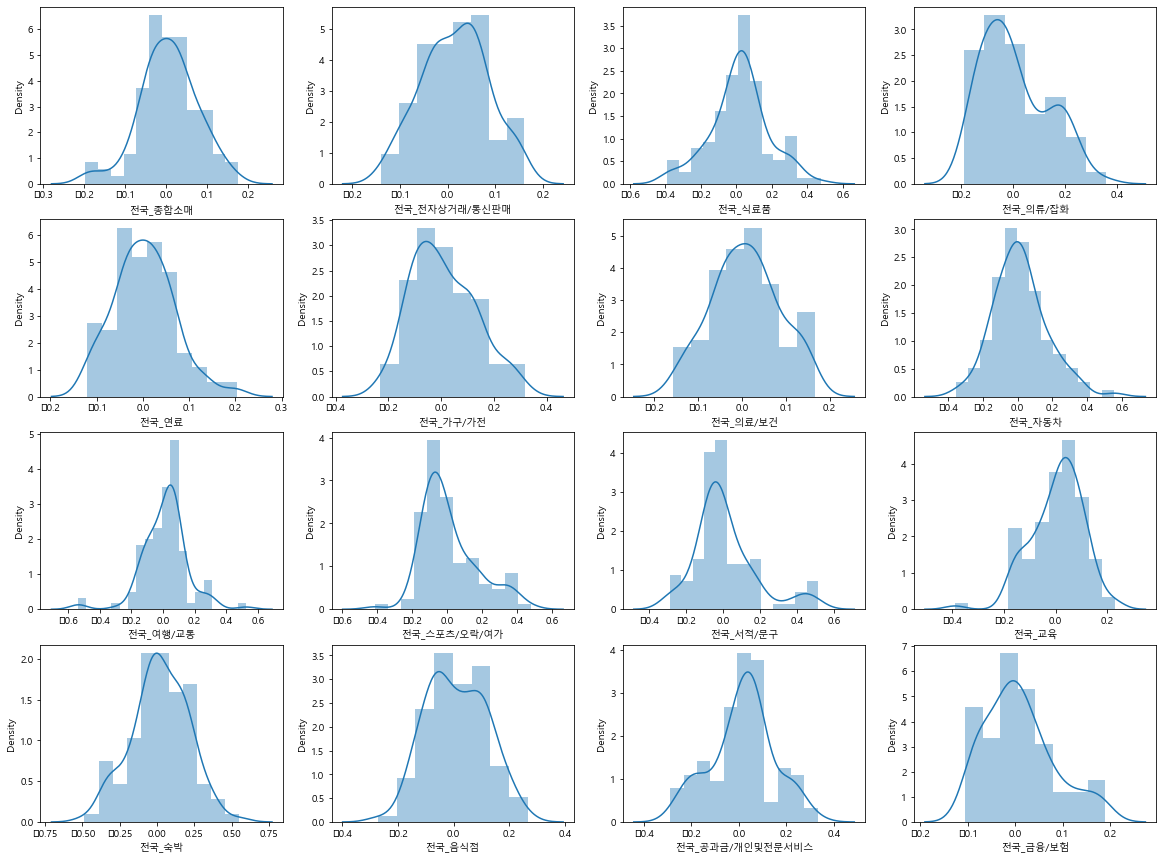

In [26]:
# 정규성 히스토그램
from matplotlib.pyplot import imread



fig, axes = plt.subplots(4, 4)
fig.set_size_inches((20,15))

sns.distplot(total_df1["전국_종합소매"], ax=axes[0,0])
sns.distplot(total_df1["전국_전자상거래/통신판매"], ax=axes[0,1])
sns.distplot(total_df1["전국_식료품"], ax=axes[0,2])
sns.distplot(total_df1["전국_의류/잡화"], ax=axes[0,3])
sns.distplot(total_df1["전국_연료"], ax=axes[1,0])
sns.distplot(total_df1["전국_가구/가전"], ax=axes[1,1])
sns.distplot(total_df1["전국_의료/보건"], ax=axes[1,2])
sns.distplot(total_df1["전국_자동차"], ax=axes[1,3])
sns.distplot(total_df1["전국_여행/교통"], ax=axes[2,0])
sns.distplot(total_df1["전국_스포츠/오락/여가"], ax=axes[2,1])
sns.distplot(total_df1["전국_서적/문구"], ax=axes[2,2])
sns.distplot(total_df1["전국_교육"], ax=axes[2,3])
sns.distplot(total_df1["전국_숙박"], ax=axes[3,0])
sns.distplot(total_df1["전국_음식점"], ax=axes[3,1])
sns.distplot(total_df1['전국_공과금/개인및전문서비스'], ax=axes[3,2])
sns.distplot(total_df1['전국_금융/보험'], ax=axes[3,3])

plt.show()

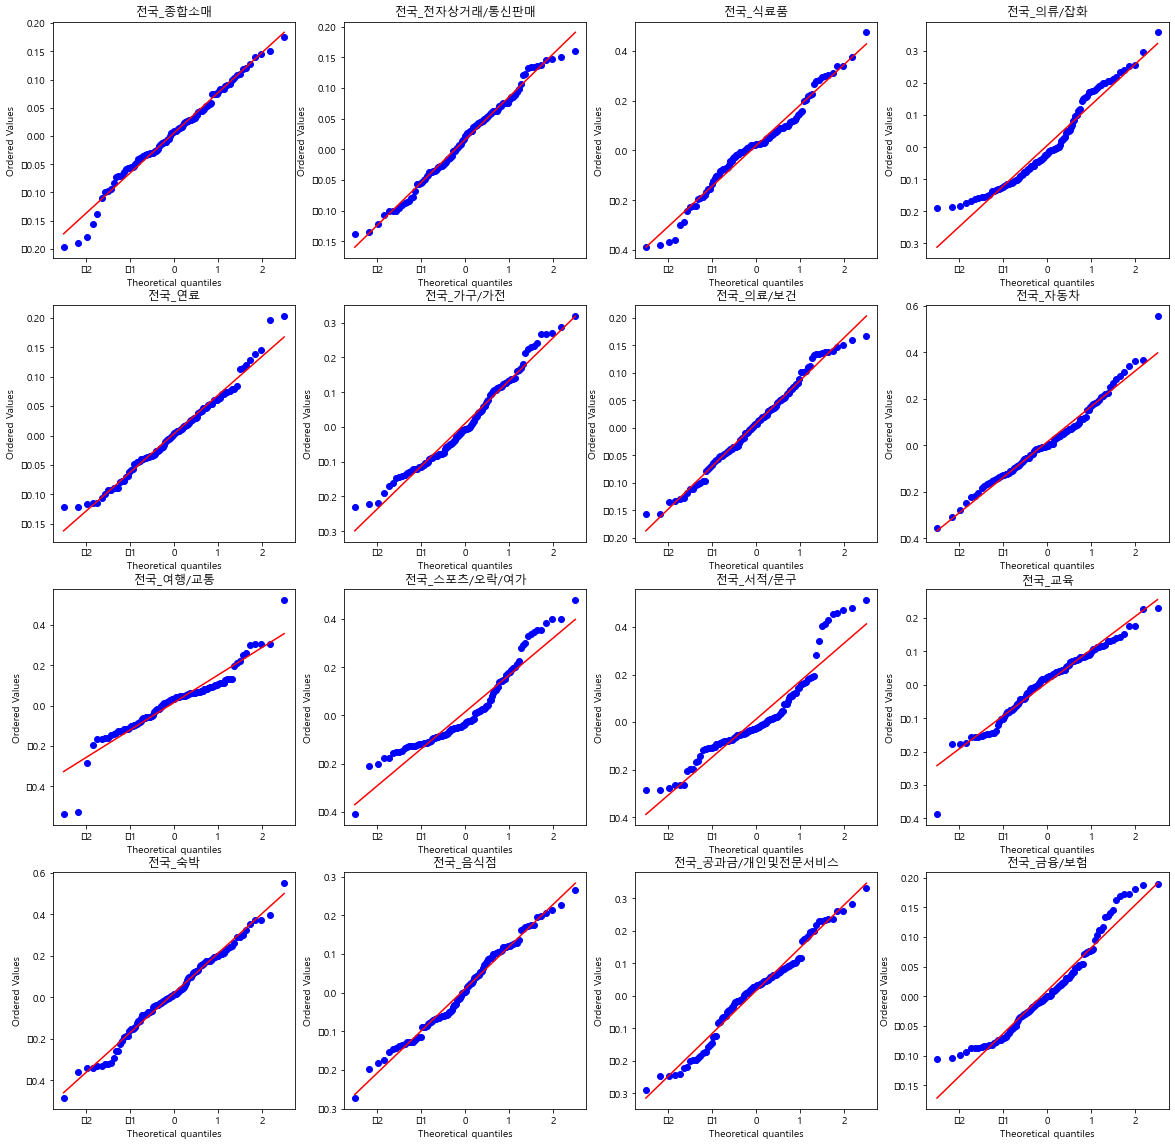

In [27]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread



fig, axes = plt.subplots(4, 4)
fig.set_size_inches((20,20))

stats.probplot(total_df1["전국_종합소매"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("전국_종합소매")
stats.probplot(total_df1["전국_전자상거래/통신판매"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("전국_전자상거래/통신판매")
stats.probplot(total_df1["전국_식료품"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("전국_식료품")
stats.probplot(total_df1["전국_의류/잡화"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("전국_의류/잡화")
stats.probplot(total_df1["전국_연료"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("전국_연료")
stats.probplot(total_df1["전국_가구/가전"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("전국_가구/가전")
stats.probplot(total_df1["전국_의료/보건"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("전국_의료/보건")
stats.probplot(total_df1["전국_자동차"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("전국_자동차")
stats.probplot(total_df1["전국_여행/교통"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("전국_여행/교통")
stats.probplot(total_df1["전국_스포츠/오락/여가"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("전국_스포츠/오락/여가")
stats.probplot(total_df1["전국_서적/문구"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("전국_서적/문구")
stats.probplot(total_df1["전국_교육"], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("전국_교육")
stats.probplot(total_df1["전국_숙박"], dist=stats.norm, plot=axes[3,0])
axes[3,0].title.set_text("전국_숙박")
stats.probplot(total_df1["전국_음식점"], dist=stats.norm, plot=axes[3,1])
axes[3,1].title.set_text("전국_음식점")
stats.probplot(total_df1['전국_공과금/개인및전문서비스'], dist=stats.norm, plot=axes[3,2])
axes[3,2].title.set_text("전국_공과금/개인및전문서비스")
stats.probplot(total_df1['전국_금융/보험'], dist=stats.norm, plot=axes[3,3])
axes[3,3].title.set_text("전국_금융/보험")

plt.show()

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


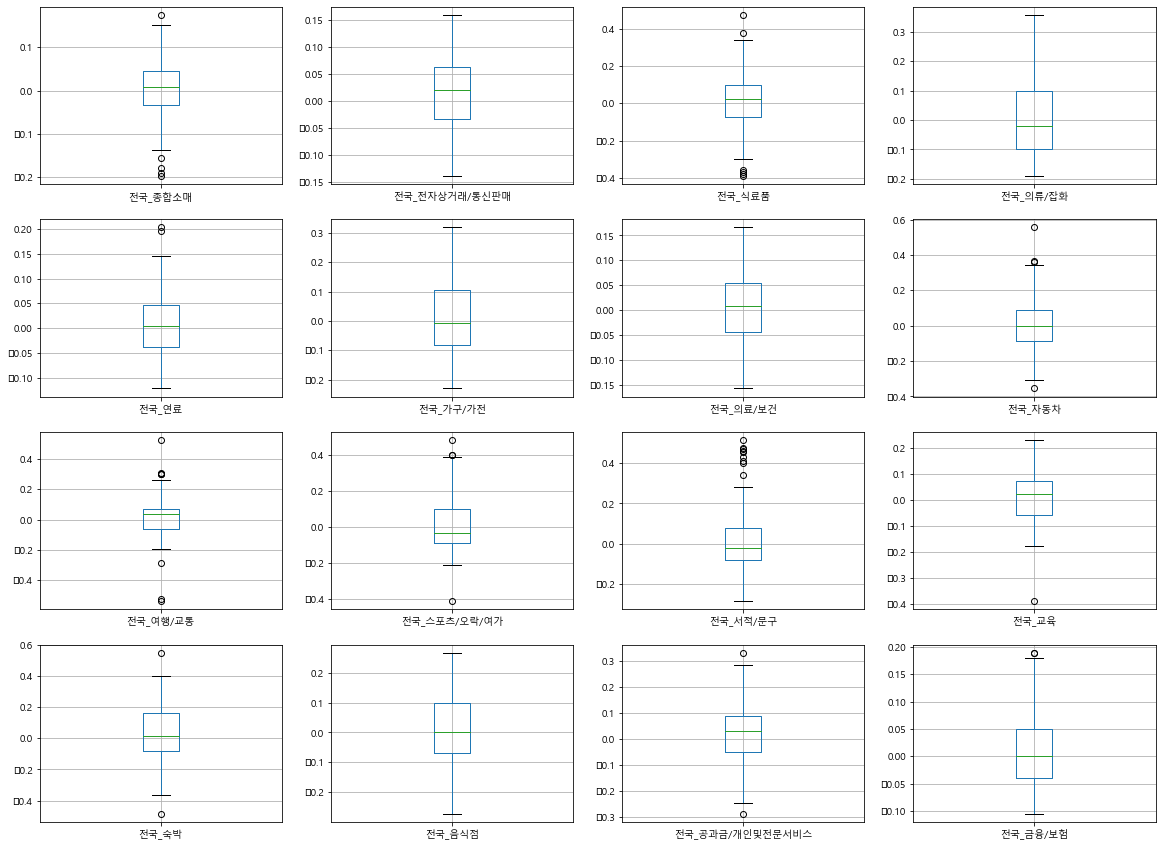

In [28]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

fig, axes = plt.subplots(4, 4)
fig.set_size_inches((20,15))

total_df1.boxplot(column="전국_종합소매", ax=axes[0,0])
total_df1.boxplot(column="전국_전자상거래/통신판매", ax=axes[0,1])
total_df1.boxplot(column="전국_식료품", ax=axes[0,2])
total_df1.boxplot(column="전국_의류/잡화", ax=axes[0,3])
total_df1.boxplot(column="전국_연료", ax=axes[1,0])
total_df1.boxplot(column="전국_가구/가전", ax=axes[1,1])
total_df1.boxplot(column="전국_의료/보건", ax=axes[1,2])
total_df1.boxplot(column="전국_자동차", ax=axes[1,3])
total_df1.boxplot(column="전국_여행/교통", ax=axes[2,0])
total_df1.boxplot(column="전국_스포츠/오락/여가", ax=axes[2,1])
total_df1.boxplot(column="전국_서적/문구", ax=axes[2,2])
total_df1.boxplot(column="전국_교육", ax=axes[2,3])
total_df1.boxplot(column="전국_숙박", ax=axes[3,0])
total_df1.boxplot(column="전국_음식점", ax=axes[3,1])
total_df1.boxplot(column="전국_공과금/개인및전문서비스", ax=axes[3,2])
total_df1.boxplot(column="전국_금융/보험", ax=axes[3,3])

plt.show()

### IQR

In [29]:
cols = []

total_df1_iqr = total_df1.copy()
total_df1_iqr = total_df1_iqr[['전국_종합소매','전국_전자상거래/통신판매', '전국_식료품','전국_의류/잡화', 
'전국_연료','전국_가구/가전', '전국_의료/보건', '전국_자동차', '전국_여행/교통', '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육','전국_숙박','전국_음식점'
,'전국_공과금/개인및전문서비스', '전국_금융/보험']]
cols.append([col for col in total_df1_iqr])

Q1 = total_df1_iqr[['전국_종합소매','전국_전자상거래/통신판매', '전국_식료품','전국_의류/잡화', 
'전국_연료','전국_가구/가전', '전국_의료/보건', '전국_자동차', '전국_여행/교통', '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육','전국_숙박','전국_음식점'
,'전국_공과금/개인및전문서비스', '전국_금융/보험']].quantile(q=0.25)

Q3 = total_df1_iqr[['전국_종합소매','전국_전자상거래/통신판매', '전국_식료품','전국_의류/잡화', 
'전국_연료','전국_가구/가전', '전국_의료/보건', '전국_자동차', '전국_여행/교통', '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육','전국_숙박','전국_음식점'
,'전국_공과금/개인및전문서비스', '전국_금융/보험']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    total_df1_iqr[i] = total_df1_iqr[i][(total_df1_iqr[i] <= Q3[i]+1.5*IQR[i]) & (total_df1_iqr[i] >= Q1[i]-1.5*IQR[i])]

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


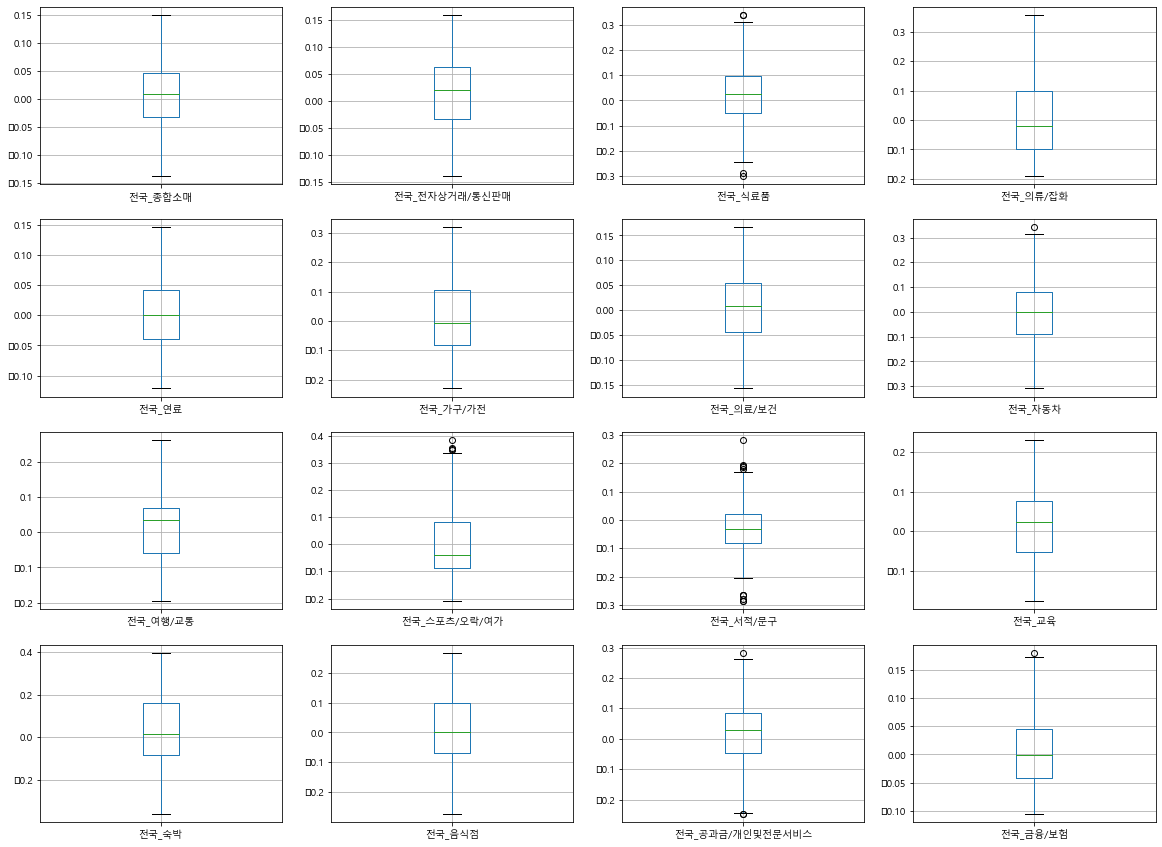

In [30]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(4, 4)
fig.set_size_inches((20,15))

total_df1_iqr.boxplot(column="전국_종합소매", ax=axes[0,0])
total_df1_iqr.boxplot(column="전국_전자상거래/통신판매", ax=axes[0,1])
total_df1_iqr.boxplot(column="전국_식료품", ax=axes[0,2])
total_df1_iqr.boxplot(column="전국_의류/잡화", ax=axes[0,3])
total_df1_iqr.boxplot(column="전국_연료", ax=axes[1,0])
total_df1_iqr.boxplot(column="전국_가구/가전", ax=axes[1,1])
total_df1_iqr.boxplot(column="전국_의료/보건", ax=axes[1,2])
total_df1_iqr.boxplot(column="전국_자동차", ax=axes[1,3])
total_df1_iqr.boxplot(column="전국_여행/교통", ax=axes[2,0])
total_df1_iqr.boxplot(column="전국_스포츠/오락/여가", ax=axes[2,1])
total_df1_iqr.boxplot(column="전국_서적/문구", ax=axes[2,2])
total_df1_iqr.boxplot(column="전국_교육", ax=axes[2,3])
total_df1_iqr.boxplot(column="전국_숙박", ax=axes[3,0])
total_df1_iqr.boxplot(column="전국_음식점", ax=axes[3,1])
total_df1_iqr.boxplot(column="전국_공과금/개인및전문서비스", ax=axes[3,2])
total_df1_iqr.boxplot(column="전국_금융/보험", ax=axes[3,3])

plt.show()

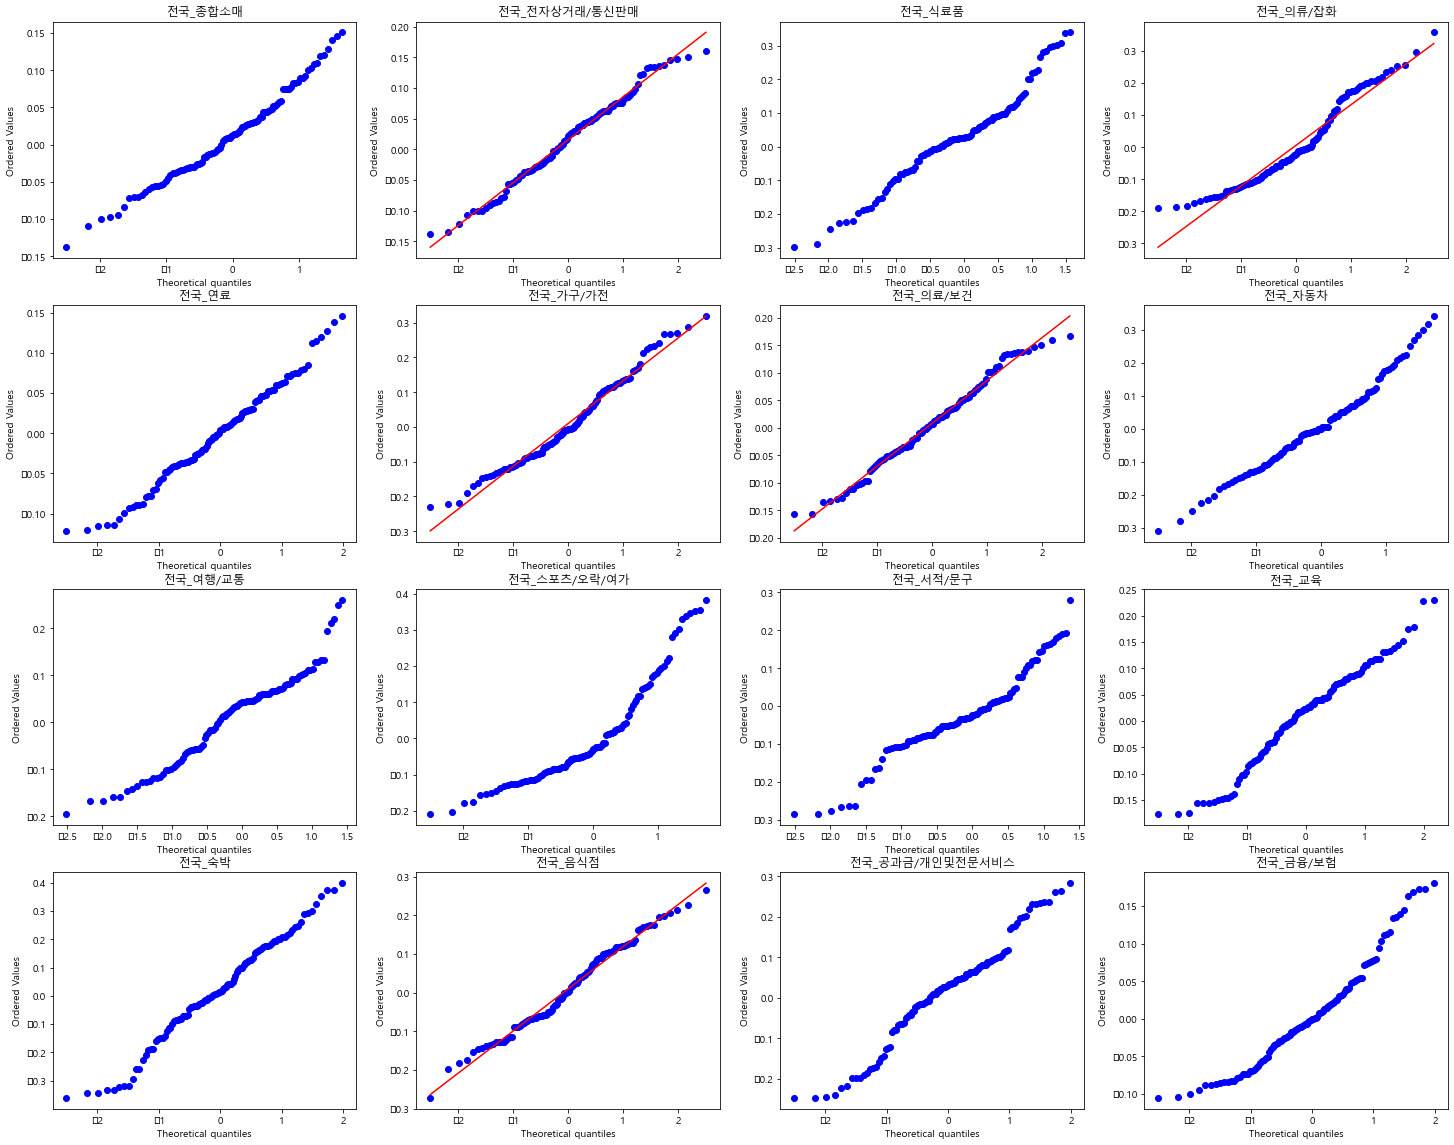

In [32]:
from matplotlib.pyplot import imread



fig, axes = plt.subplots(4, 4)
fig.set_size_inches((25,20))

stats.probplot(total_df1_iqr["전국_종합소매"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("전국_종합소매")
stats.probplot(total_df1_iqr["전국_전자상거래/통신판매"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("전국_전자상거래/통신판매")
stats.probplot(total_df1_iqr["전국_식료품"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("전국_식료품")
stats.probplot(total_df1_iqr["전국_의류/잡화"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("전국_의류/잡화")
stats.probplot(total_df1_iqr["전국_연료"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("전국_연료")
stats.probplot(total_df1_iqr["전국_가구/가전"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("전국_가구/가전")
stats.probplot(total_df1_iqr["전국_의료/보건"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("전국_의료/보건")
stats.probplot(total_df1_iqr["전국_자동차"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("전국_자동차")
stats.probplot(total_df1_iqr["전국_여행/교통"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("전국_여행/교통")
stats.probplot(total_df1_iqr["전국_스포츠/오락/여가"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("전국_스포츠/오락/여가")
stats.probplot(total_df1_iqr["전국_서적/문구"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("전국_서적/문구")
stats.probplot(total_df1_iqr["전국_교육"], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("전국_교육")
stats.probplot(total_df1_iqr["전국_숙박"], dist=stats.norm, plot=axes[3,0])
axes[3,0].title.set_text("전국_숙박")
stats.probplot(total_df1_iqr["전국_음식점"], dist=stats.norm, plot=axes[3,1])
axes[3,1].title.set_text("전국_음식점")
stats.probplot(total_df1_iqr['전국_공과금/개인및전문서비스'], dist=stats.norm, plot=axes[3,2])
axes[3,2].title.set_text("전국_공과금/개인및전문서비스")
stats.probplot(total_df1_iqr['전국_금융/보험'], dist=stats.norm, plot=axes[3,3])
axes[3,3].title.set_text("전국_금융/보험")

plt.show()

<AxesSubplot:xlabel='날짜'>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


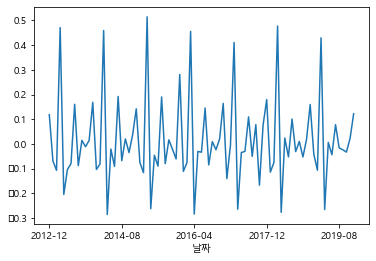

In [185]:
total_df1['전국_서적/문구'].plot()

In [190]:
total_df1_iqr['전국_서적/문구'].describe()

count    78.000000
mean     -0.024443
std       0.118805
min      -0.286140
25%      -0.084219
50%      -0.032329
75%       0.020977
max       0.281181
Name: 전국_서적/문구, dtype: float64

In [ ]:
import numpy as np



c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


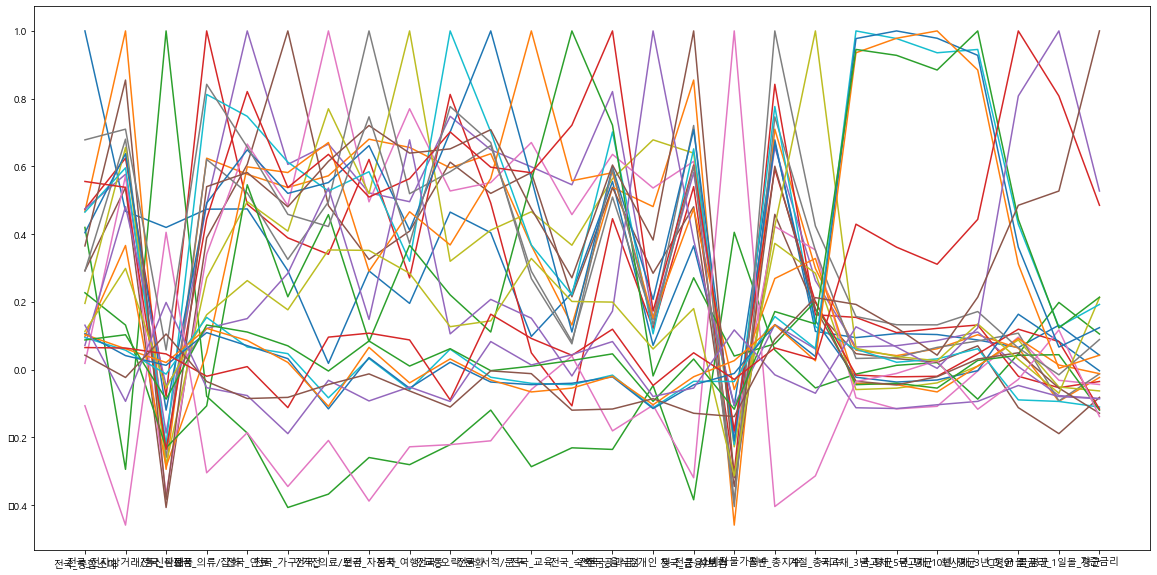

In [92]:
plt.figure(figsize=(20,10))
plt.plot(total_df1.corr())
plt.show()

In [66]:
# 계절 나누는 함수
def seasons(s):
    if s.endswith("3") or s.endswith("4") or s.endswith("5"):
        return "봄"
    elif s.endswith("6") or s.endswith("7") or s.endswith("8"):
        return "여름"
    elif s.endswith("9") or s.endswith("10") or s.endswith("11"):
        return "가을"
    else:
        return "겨울"

In [69]:
# str 타입이 아니면 함수를 적용 못하기 때문에 데이터 타입 변경
total_df1 = total_df1.reset_index(level=0)
total_df1["날짜"] = total_df1["날짜"].astype(str)

In [70]:
# 계졀 나누는 함수 적용
total_df1["계절"] = total_df1["날짜"].apply(seasons)

In [71]:
# 계절 컬럼에 년도 추가
total_df1["계절"] = total_df1["날짜"].str[:4] + " " + total_df1["계절"]
total_df1 = total_df1.set_index('날짜')
total_df1.head()

,전국_종합소매,전국_전자상거래/통신판매,전국_식료품,전국_의류/잡화,전국_연료,전국_가구/가전,전국_의료/보건,전국_자동차,전국_여행/교통,전국_오락/문화,...,불변_총지수,계절_총지수,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리,계절
날짜,,,,,,,,,,,,,,,,,,,,,
2012-12,0.077909,0.027613,0.024488,-0.031449,-0.019097,-0.122218,-0.049408,0.192904,0.071612,-0.083770,...,0.023590,0.004228,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.0,2012 겨울
2013-01,-0.109930,-0.047579,0.026437,-0.156039,-0.023171,-0.006880,0.134797,-0.309056,0.059998,-0.102781,...,-0.086172,-0.006316,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.0,2013 겨울
2013-02,-0.063111,-0.138342,0.096626,-0.068648,-0.088923,-0.023821,-0.133135,0.037585,-0.141945,-0.138970,...,-0.048246,0.000000,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.0,2013 겨울
2013-03,0.029723,0.085685,-0.133374,0.183154,0.112232,0.270387,0.087816,0.223547,0.045869,0.386251,...,0.078341,-0.005297,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.0,2013 봄
2013-04,0.052395,0.045225,0.001931,-0.009763,-0.027114,-0.081842,-0.038601,0.004995,0.060437,-0.038189,...,-0.018162,0.000000,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.0,2013 봄


<AxesSubplot:xlabel='날짜'>

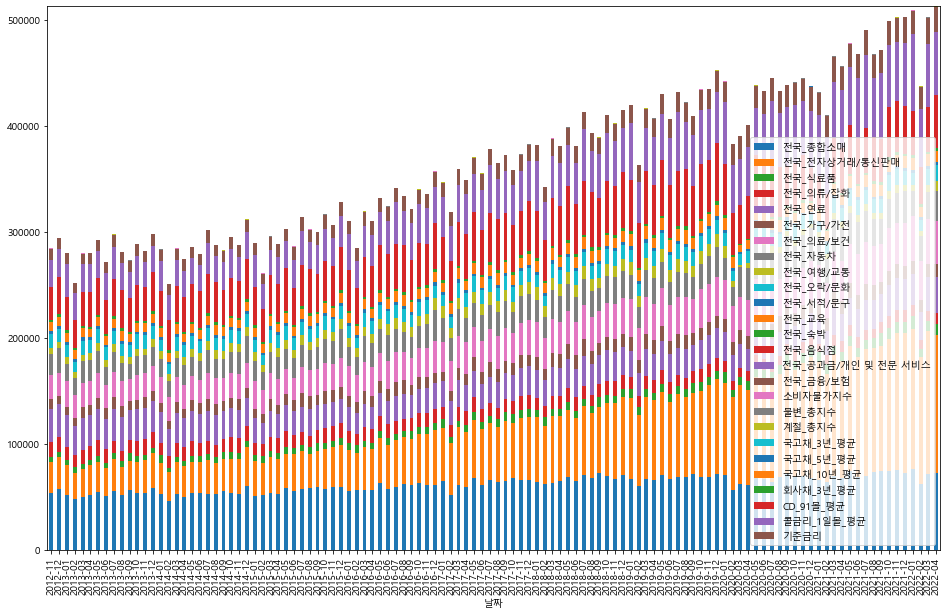

In [100]:
import matplotlib.pyplot as plt
import matplotlib

total_df.plot(kind='bar',figsize=(16,10),stacked=True)

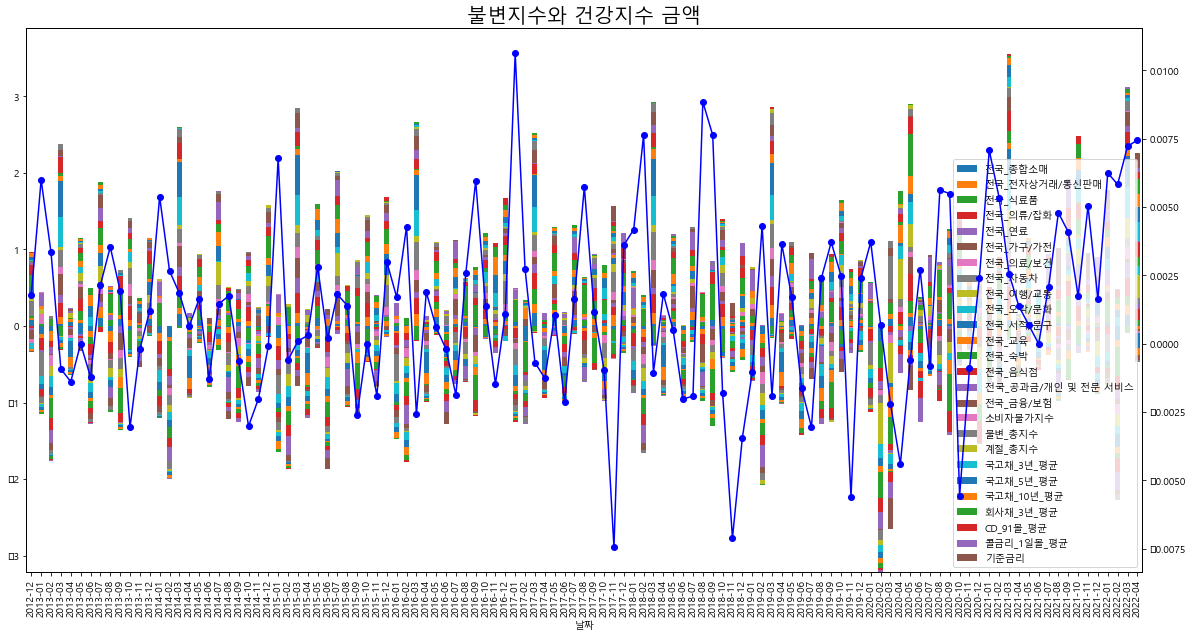

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "불변지수와 건강지수 금액"
left_ax = total_df1
right_ax = total_df1['소비자물가지수']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


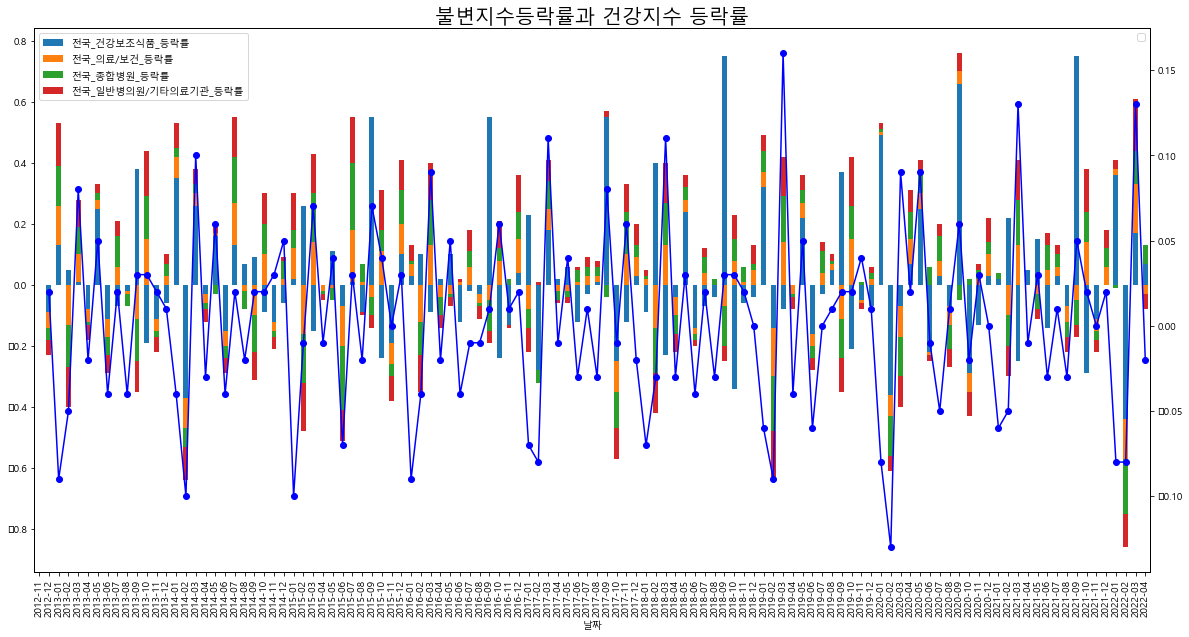

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "불변지수등락률과 건강지수 등락률"
left_ax = df_hospital_b1[['전국_건강보조식품_등락률','전국_의료/보건_등락률','전국_종합병원_등락률','전국_일반병의원/기타의료기관_등락률']]
right_ax = df_hospital_b1['불변_총지수_등락률']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


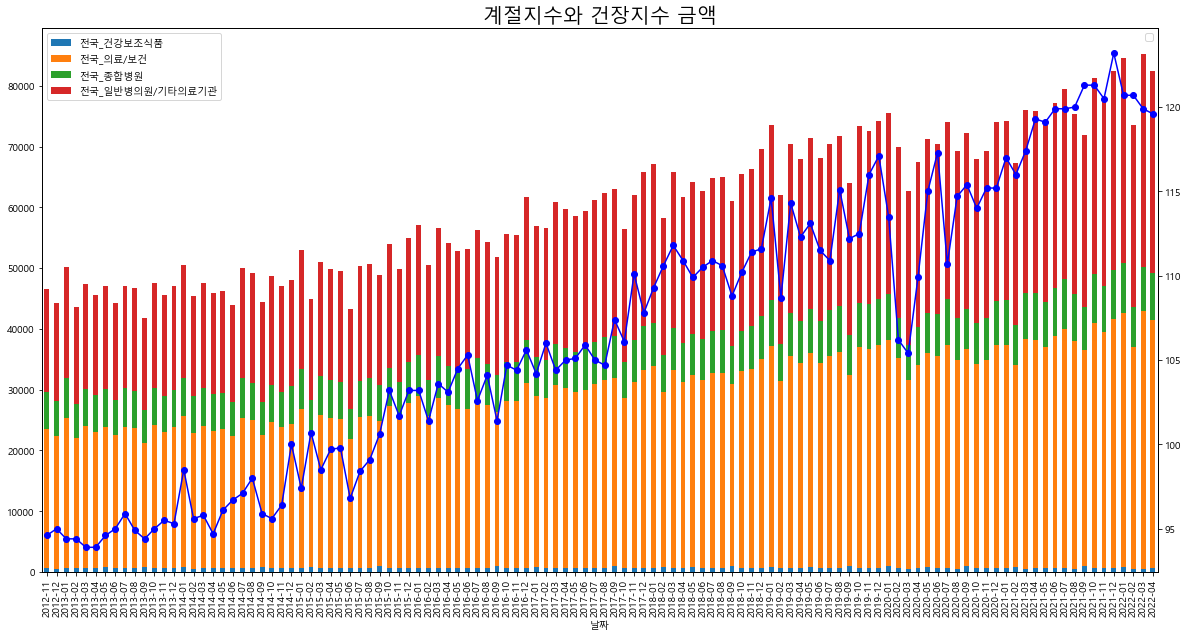

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "계절지수와 건장지수 금액"
left_ax = df_hospital_s[['전국_건강보조식품','전국_의료/보건','전국_종합병원','전국_일반병의원/기타의료기관']]
right_ax = df_hospital_s['계절_총지수']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


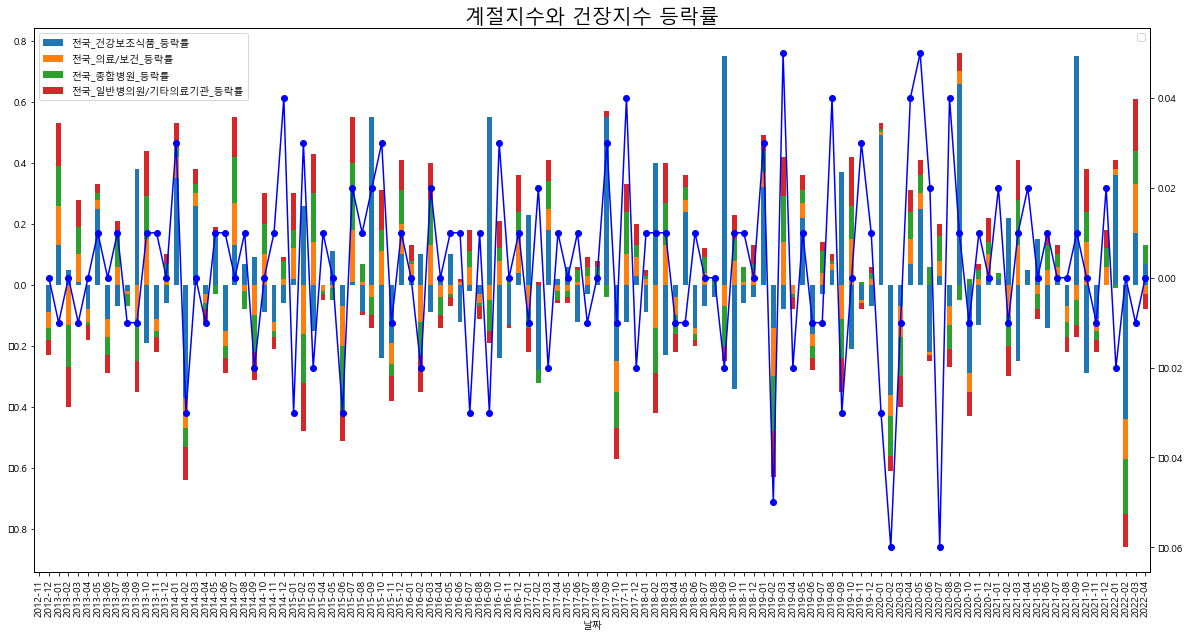

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "계절지수와 건장지수 등락률"
left_ax = df_hospital_s1[['전국_건강보조식품_등락률','전국_의료/보건_등락률','전국_종합병원_등락률','전국_일반병의원/기타의료기관_등락률']]
right_ax = df_hospital_s1['계절_총지수_등락률']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


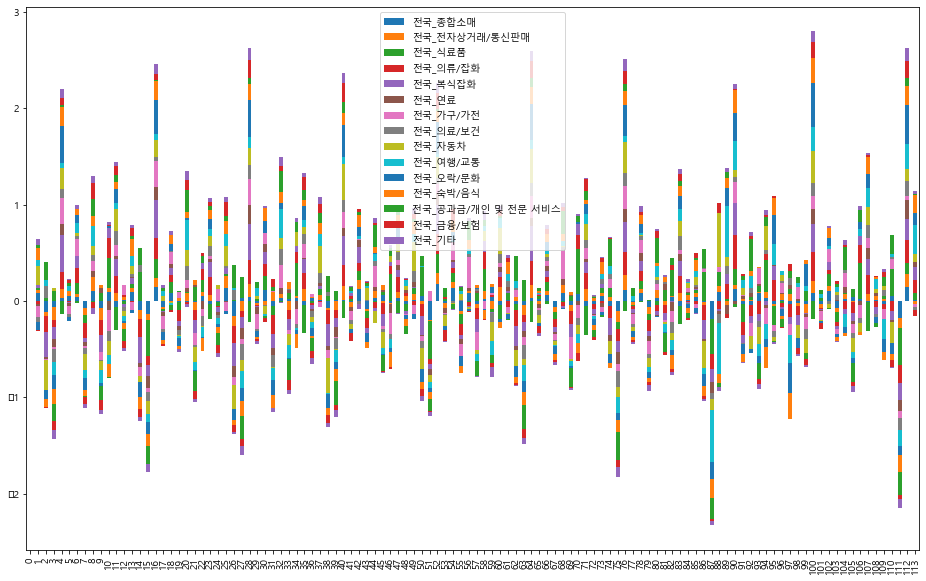

In [64]:
df_t1.plot(kind='bar',figsize=(16,10),stacked=True)

<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


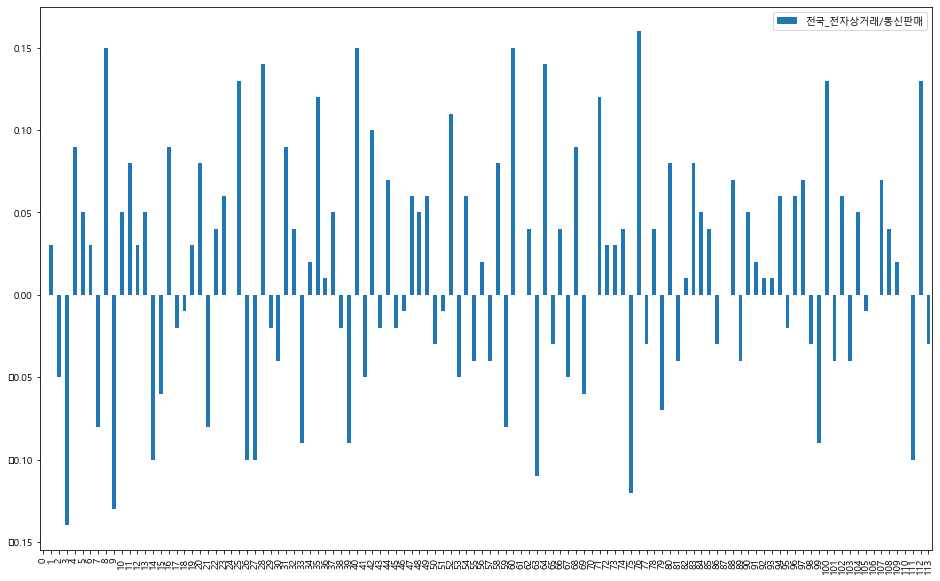

In [103]:
df_on1.plot(kind='bar',stacked=True,figsize=(16,10))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


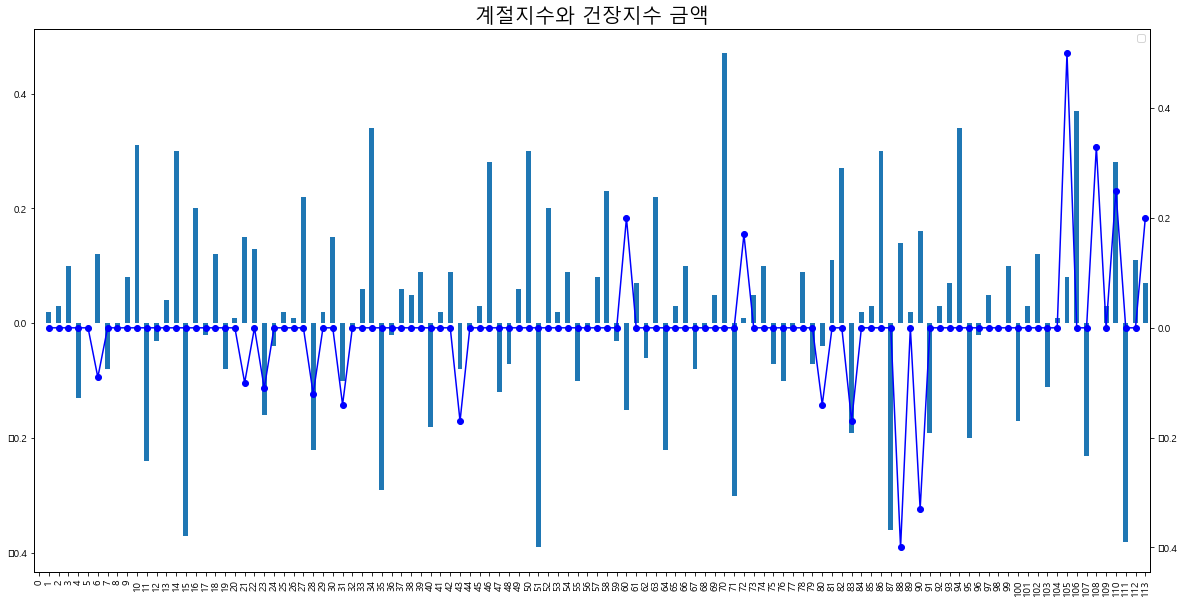

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "계절지수와 건장지수 금액"
left_ax = df_nondura1['전국_식료품']
right_ax = interest_rates_df1['기준금리']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

In [313]:
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전국_금융/보험', ylabel='Density'>

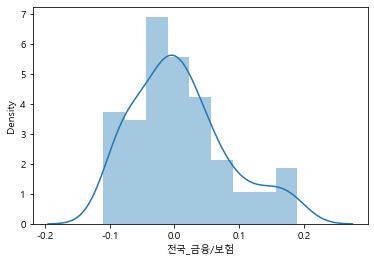

In [138]:
# 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(df_t1["전국_금융/보험"])